In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [3]:
# Step 1: Load the data
data = pd.read_excel("/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/18/CocaCola_Sales_Rawdata.xlsx")
data.columns = ['ds', 'y']


In [4]:
data

,ds,y
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [5]:
data.describe()

,y
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      42 non-null     object 
 1   y       42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


### Visualization

<Axes: >

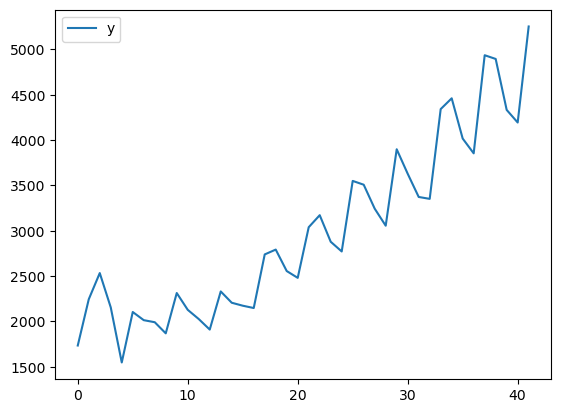

In [7]:
data.plot()

array([[<Axes: title={'center': 'y'}>]], dtype=object)

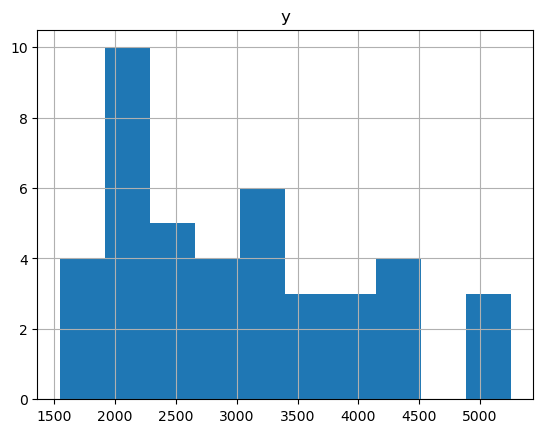

In [8]:
data.hist()

<Axes: >

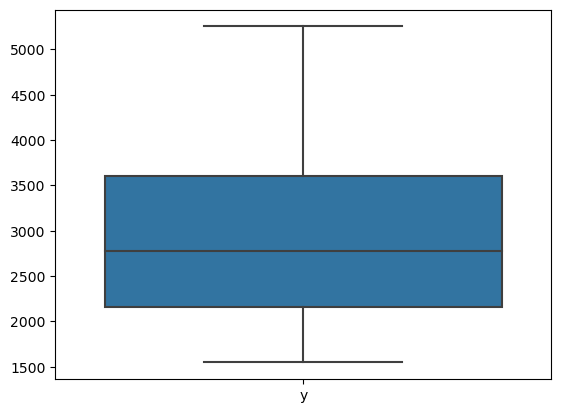

In [9]:
import seaborn as  sns
sns.boxplot(data =data)

<Axes: ylabel='Density'>

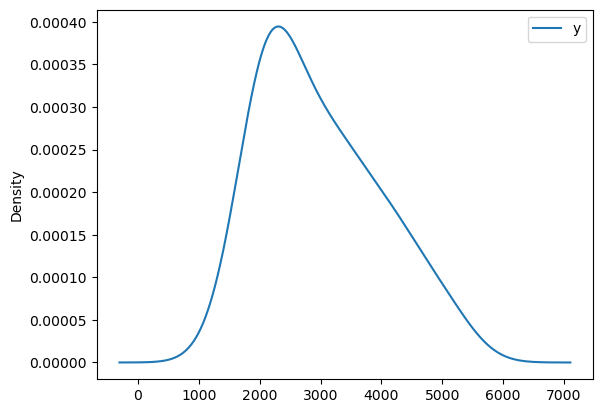

In [10]:
data.plot(kind="kde")

In [11]:
np.array(data["y"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_1898/1077873733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['y'],kde=True)


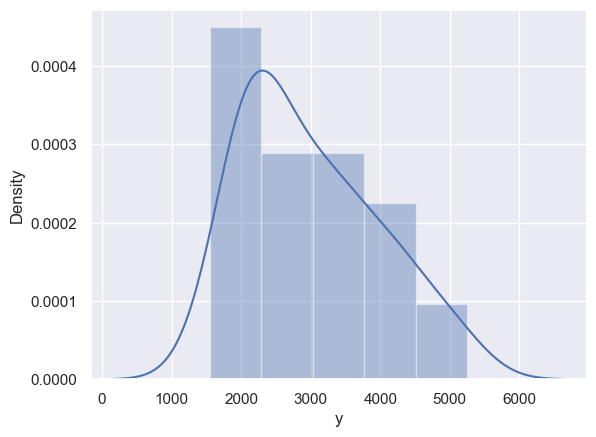

In [12]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(data['y'],kde=True)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

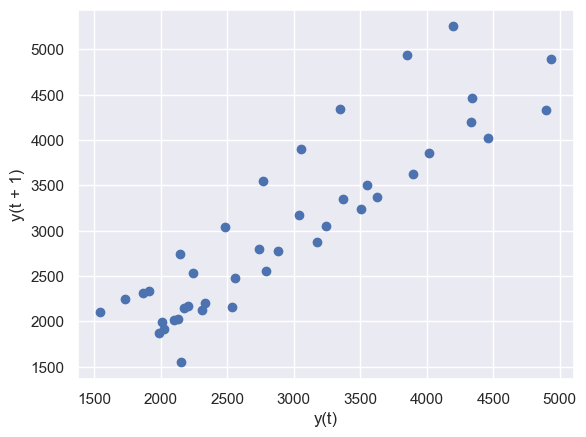

In [13]:
from pandas.plotting import lag_plot
lag_plot(data['y'])

# Data Preprocessing

In [14]:
len(data)

42

In [15]:
data['quarter'] = 0
for i in range(42):
    p=data['ds'][i]
    data['quarter'][i]=p[0:2]

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_1898/3814223245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=p[0:2]


In [16]:
data

,ds,y,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [17]:
data['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [18]:
#Create Dummy Variables
data_dummies=pd.DataFrame(pd.get_dummies(data['quarter']),columns=['Q1','Q2','Q3','Q4'])
cola=pd.concat([data,data_dummies],axis= 1)

In [19]:
data.head()

,ds,y,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [20]:
cola

,ds,y,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [21]:
# Create 't' variable representing time steps
cola['t'] = np.arange(1, len(data) + 1)

In [22]:
# Add 'Sales_log' column for exponential model
cola['Sales_log'] = np.log(data['y'])


In [23]:
cola.head()

,ds,y,quarter,Q1,Q2,Q3,Q4,t,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,7.344602


In [30]:
train =cola.head(32)
test =cola.tail(10)

In [32]:
train.head()

,ds,y,quarter,Q1,Q2,Q3,Q4,t,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,7.344602


# Models

In [33]:
import statsmodels.formula.api as smf
# Linear Model
linear_formula = "y ~ t"
linear_model = smf.ols(formula=linear_formula, data=train).fit()
linear_pred = linear_model.predict(test['t'])
linear_rmse = np.sqrt(mean_squared_error(test['y'], linear_pred))

In [34]:
# Quadratic Model
quadratic_formula = "y ~ t + np.power(t, 2)"
quadratic_model = smf.ols(formula=quadratic_formula, data=train).fit()
quadratic_pred = quadratic_model.predict(test['t'])
quadratic_rmse = np.sqrt(mean_squared_error(test['y'], quadratic_pred))


In [35]:
# Exponential Model
exponential_formula = "Sales_log ~ t"
exponential_model = smf.ols(formula=exponential_formula, data=train).fit()
exponential_pred = np.exp(exponential_model.predict(test['t']))
exponential_rmse = np.sqrt(mean_squared_error(test['y'], exponential_pred))

In [36]:
# ARIMA Model
arima_order = (1, 0, 1)
arima_model = ARIMA(train['y'], order=arima_order)
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
arima_rmse = np.sqrt(mean_squared_error(test['y'], arima_forecast))

# Model Evaluation

In [37]:
print(f"RMSE for Linear model: {linear_rmse}")
print(f"RMSE for Quadratic model: {quadratic_rmse}")
print(f"RMSE for Exponential model: {exponential_rmse}")
print(f"RMSE for ARIMA model: {arima_rmse}")


RMSE for Linear model: 752.9233932767117
RMSE for Quadratic model: 457.73573554074096
RMSE for Exponential model: 590.3316432076557
RMSE for ARIMA model: 1194.8988066765023


In [38]:
# Choose the model with the least RMSE
best_model = min(linear_rmse, quadratic_rmse, exponential_rmse, arima_rmse)

if best_model == linear_rmse:
    print("Linear model selected for forecasting.")
elif best_model == quadratic_rmse:
    print("Quadratic model selected for forecasting.")
elif best_model == exponential_rmse:
    print("Exponential model selected for forecasting.")
else:
    print("ARIMA model selected for forecasting.")

Quadratic model selected for forecasting.


### actual forecasting using the selected quadratic model

In [39]:
# Fit the Quadratic Model
quadratic_formula = "y ~ t + np.power(t, 2)"
quadratic_model = smf.ols(formula=quadratic_formula, data=train).fit()

In [40]:
# Add 't_squared' to the test dataset
test['t'] = np.arange(len(train) + 1, len(train) + 1 + len(test))
test['t_squared'] = test['t'] ** 2

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_1898/3738094699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['t'] = np.arange(len(train) + 1, len(train) + 1 + len(test))
/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_1898/3738094699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['t_squared'] = test['t'] ** 2


In [41]:
# Predict future values using the Quadratic Model
forecasted_values = quadratic_model.predict(test[['t', 't_squared']])

In [42]:
# Print the forecasted values
print(forecasted_values)

32    3899.007943
33    4027.639391
34    4160.494601
35    4297.573572
36    4438.876305
37    4584.402800
38    4734.153056
39    4888.127074
40    5046.324854
41    5208.746395
dtype: float64


### Validation & Visualizations

In [43]:
#Compare Forecasted Values with Actual Values
comparison_df = pd.DataFrame({'Actual': test['y'], 'Forecasted': forecasted_values})


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#Calculate Forecast Errors
forecast_errors = comparison_df['Actual'] - comparison_df['Forecasted']
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Forecasted'])
mse = mean_squared_error(comparison_df['Actual'], comparison_df['Forecasted'])
rmse = np.sqrt(mse)

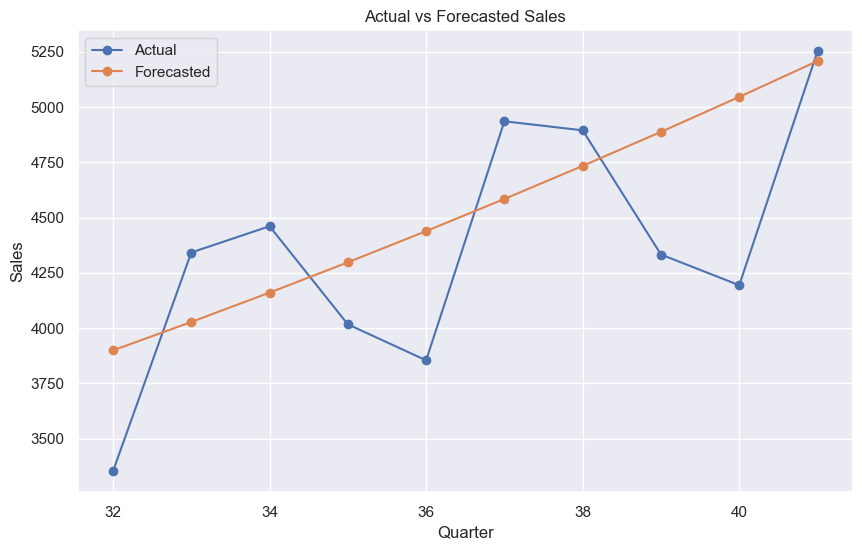

In [46]:
#Visualize Forecasted Values and Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df.index, comparison_df['Forecasted'], label='Forecasted', marker='o')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.grid(True)
plt.show()

##### Ideally, the forecasted line should closely follow the actual line.
##### The forecasted sales (orange line) appear to be capturing the overall trend of the actual sales (blue line) reasonably well.
##### There is a noticeable shift in the forecasted values compared to the actual values as the time progresses. This indicates that the model might not capture some short-term fluctuations or seasonality patterns in the sales data.


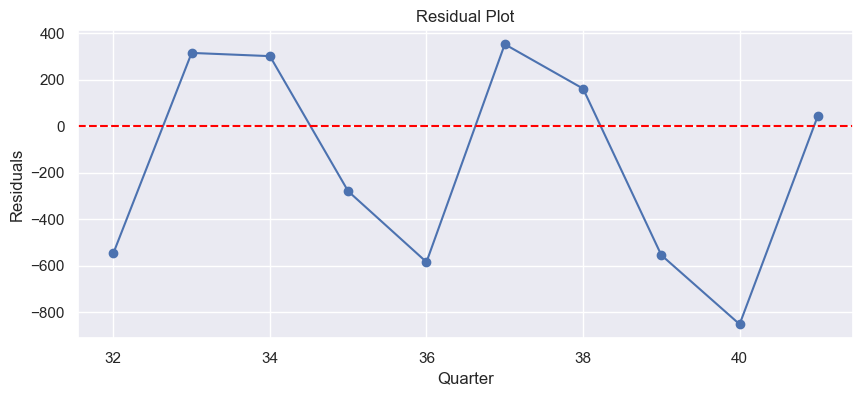

In [48]:
#Residual Analysis
plt.figure(figsize=(10, 4))
plt.plot(comparison_df.index, forecast_errors, marker='o')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Quarter')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


##### Ideally, the residuals should be randomly scattered around the horizontal line at zero, indicating that the model's errors are unbiased and random.
##### The residual plot shows a pattern of residuals with alternating positive and negative values, suggesting that the model might have difficulty capturing some seasonality or trend patterns in the sales data.
##### There is a slight upward trend in the residuals towards the right end of the plot, indicating that the model might not fully account for the increasing sales trend.


In [49]:
#Forecast Accuracy Metrics
mape = mean_absolute_percentage_error(comparison_df['Actual'], comparison_df['Forecasted'])

In [50]:
# Print the evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 399.1473505310504
Mean Squared Error (MSE): 209522.00359102312
Root Mean Squared Error (RMSE): 457.73573554074096
Mean Absolute Percentage Error (MAPE): 0.09684120628736556


##### Overall, the quadratic model appears to provide reasonable forecasts for the sales data in the 'test' dataset.